### IBM Applied Data Science Capstone

In [4]:
import pandas as pd
from geopy.geocoders import Nominatim 
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium 

#### Backgroud and Business Problem

In this project we will be looking at the dental care services supply in Prague.

Czech Republic is one of the Eastern European countries that went through a successful transformation from ex-communist to market economy. The country has a diversified economy that grows by 3-5% per annum compared to 1.5-2.5% on average for EU. The per capita GDP (nominal) is 22.6 kUSD, services sector accounts for about 60% of the economy.

Prague is a relatively large city with the population of 1.3 million people (13th largest city in the EU). It is located in the center of Europe, in a several hours' driving distance from such 'richer' countries as Germany and Austria. Prague is a quite popular tourist destination, annually it welcomes more than 8 million visitors. 

Our analysis below covers the dental services supply in Prague. Our report is targeted at the stakeholders interested in opening a dental clinic in this city. We will explore how developed is the dental services market in Prague. More specifically, how many dental clinics are there, where are they located? Are they spread evenly or tend to concentrate in particular areas? Is the competition high or low compared to other cities?


#### Data

Firstly, we will choose a couple of cities for comparison. 
Based on the information from wikipedia we can select several European cities. Some of them are significantly smaller or larger than Prague, others may be of similar size but located in countries with much higher or lower GDP (see the table below)

In [5]:
cities = pd.read_csv('cities.csv') # data collected from wikipedia
cities

City  Population (thousand)         Country  GDP per capita (USD)
0        Prague                   1305  Czech Republic                 22627
1       Tallinn                    446         Estonia                 22986
2         Porto                   1313        Portugal                 21608
3        Vilnus                    539       Lithuania                 19883
4  Thessaloniki                    812          Greece                 18168
5         Sofia                   1281        Bulgaria                  9826
6         Viena                   1929         Austria                 48634
7      Budapest                   1768         Hungary                 15373
8        Munich                   1538         Germany                 45466
9       Cologne                   1119         Germany                 45466

We will take the following approach: 
- choose one city of similar size (population) from a country with a similar income - **Porto** from **Portugal**
- choose another city of a comparable size from a 'richer' country - **Cologne** from **Germany**. Cologne also has another similarity with Prague- it's a cultural center and a popular tourist destination.

We will then work with the Google Places API to locate dental clinics in those cities (I was unable to set up a Foursquare developer account, so I had to use Google instead).

We will have to limit our search by the central part of each city, so we will select 40 central districts in each city.

Here is the example of how it will look for **Prague**:

In [6]:
pr_Neighbourhood = ['Podskali', 'Zizkov', 'Karlin', 'Smichov', 'Vrsovice', 'Flora', 'Praha 1', 'Visehrad', 'Fidlovacka',
                   'Nove vrsovice', 'Na ohrade', 'Praha 3', 'Invalidovna', 'Maniny', 'Praha 7', 'Letna', 'Praha 6', 'Stromky',
                   'Eden', 'Jezerka', 'Strahov', 'Klamovka', 'Stare mesto', 'Petrska', 'Praha2', 'Nusle', 'Stare Vrsovice',
                   'Bohdalec', 'Trnkov', 'Trebesin', 'Praha 10', 'Praha 4', 'Praha 5', 'Praha 8', 'Praha 9', 
                   'Stresovice', 'Hanspaulka', 'Brevnov', 'Dejvice', 'Kavci hori']

pr_Lat = [50.07079741867177, 50.08445769736433, 50.095306032169994, 50.07206446309905, 50.06793267308436, 50.076856893558386,
         50.08913875215664, 50.06385562471276, 50.06451679123436, 50.072284815212946, 50.09123131110529, 50.08467799252541,
         50.09420479057065, 50.10339938286262, 50.10213316654759, 50.0948104766868, 50.10004108365182, 50.07669164549918,
         50.06754702110221, 50.062367966633914, 50.08208946010505, 50.07112795512305, 50.087665646032704, 50.09143780882558,
         50.07433679583632,  50.05514941533021, 50.06891056213366, 50.05867108378713, 50.06098537684574, 50.08147852784995,
         50.07216955284876,  50.04310180689991, 50.070434248203014, 50.11679762560612, 50.11096337407674,
         50.091666754300384, 50.10438522865994, 50.08307574471036, 50.09871463770808, 50.05271953148158]

pr_Lng = [14.41694900863502, 14.45119545109991, 14.448963853345305, 14.402958607327307, 14.45831939777807, 14.46106597962989,
         14.415575717709109, 14.420725558681271, 14.433342669063075, 14.473168105936905, 14.468533249061958, 14.469477386573521,
         14.465100022235006, 14.454628678924939, 14.432055209330285, 14.409224247687023, 14.395148015696442, 14.470850677987254,
         14.4696490484383, 14.444586489040429, 14.383045888509104, 14.38218758168041, 14.420210574483132, 14.42939445769314,
         14.435273859256627, 14.438385222257793, 14.45160314734118, 14.46687665755242, 14.489707619195682, 14.48584523846656,
         14.486875206660992, 14.437436733328216, 14.374951996199291, 14.466619164292668, 14.503869680657987,
         14.379071865405262, 14.371518765312754, 14.36954465960676, 14.375724468773354, 14.424991282557112]

pr_locations = pd.DataFrame()
pr_locations['Neighbourhood'] = pr_Neighbourhood
pr_locations['Latitude'] = pr_Lat
pr_locations['Longitude'] = pr_Lng

In [7]:
map_praha = folium.Map(location=[50.0874654, 14.4212535], zoom_start=12)

# add markers to map
for lat, lng, neighbourhood in zip(pr_locations['Latitude'], pr_locations['Longitude'], pr_locations['Neighbourhood']):
    label = '{}'.format(neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_praha)  
    
map_praha

The selected **Porto** districts are mapped below

In [8]:
Neighbourhood = ['Nevogilde', 'Aldoar', 'Pereiro', 'Vilarinha', 'Pacos', 'Fonte do moura',
                 'Campinas', 'Pinheiro manso', 'Bairro comes da costa', 'Romalde do meio', 'Viso de baixo', 
                'Sra do porto', 'Prelada', 'Boavista', 'Bairro silva braga', 'Monte dos burgos', 'Bairro do amial', 'Bairro da azenha',
                'Covelo', 'Fontainhas', 'Godim', 'Cruz', 'Massarelos', 'Santo lldefonso', 'Pasteleira', 'Bonfim', 'Sra da hora',
                'Areosa', 'Lordelo do ouro', 'Aldeia de baixo', 'Maceda', 'Castelo', 'Candal', 'Alumiara', 'Sampaio','Areinho',
                'Formigosa', 'Vila nova de gaia', 'Granja', 'Aldeia nova']
Lat = [41.1686220299004, 41.17362920970329, 41.17143255858922, 41.16655443758855, 41.161546717103526, 41.16564984543429,
      41.16736209850716, 41.16548830971186, 41.1566355485125, 41.1735646033569, 41.17899131339884, 41.176116505185, 
       41.170011156910356, 41.159608141839776, 41.17259550061917, 41.179637320455086, 41.17595499546366, 41.17996032154307,
      41.16770131325242, 41.14275627740515, 41.155359230575534, 41.17429142102023, 41.151804796741885, 41.152451071770955, 
      41.153614350768436, 41.15122314376862, 41.18333558759546, 41.1776508285751, 41.15619934140592, 41.18629584065921,
      41.16098632634058, 41.13991722155285, 41.135327653689025, 41.13125495137971, 41.137137662445305, 41.136943735240514,
      41.129832678228155, 41.123626034942994, 41.15032336163414, 41.13843049533875]
Lng = [-8.686275980144966, -8.66765072085485, -8.659496805982256, -8.669925233883601, -8.67155601685812, -8.66069843547514, 
      -8.6540036416394, -8.652716181396361, -8.66275837129208, -8.639841577897782, -8.643875619995445, -8.635550043757114,
      -8.633103869295335, -8.625379106710058, -8.62018635039646, -8.630614778230525, -8.618898890018851, -8.611603281974954,
      -8.603191872799663, -8.599930308157102, -8.591433069622223, -8.580103419051712, -8.630228539277278, -8.609028360608535,
      -8.662844198767651, -8.595123789983694, -8.650398750480514, -8.585682412692478, -8.651085394765976, -8.592794510256748,
      -8.572452636829901, -8.62635430784744, -8.632791610436392, -8.651502699301922, -8.65021523905888, -8.587987992341265,
      -8.58300981273484, -8.61159143013035, -8.56601533645013, -8.560608003429357]
df1 = pd.DataFrame()
df1['Neighbourhood'] = Neighbourhood
df1['Latitude'] = Lat
df1['Longitude'] = Lng

In [9]:
map_porto = folium.Map(location=[41.1494512, -8.6107884], zoom_start=12)

# add markers to map
for lat, lng, neighbourhood in zip(df1['Latitude'], df1['Longitude'], df1['Neighbourhood']):
    label = '{}'.format(neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_porto)  
    
map_porto

**Cologne** center map

In [10]:
koln_neighbourhood = ['Deutz', 'Latin Quarter', 'Sudstadt', 'Sulz', 'Poll', 'Humboldt-Gremberg', 'Kalk', 'Buchforst', 
                     'Agnesviertel', 'Ehrenfeld', 'Vingst', 'Mulheim', 'Buchheim', 'Hohenberg', 'Riehl', 'Nippes',
                     'Mauenheim', 'Bilderstockchen', 'Bickendorf', 'Vogelsang', 'Mungersdorf', 'Braunsfeld',
                     'Stuttgenhof', 'Lindenthal', 'Bayenthal', 'Belgisches Viertel', 'Old market', 'Weidenpesch',
                     'Stammheim', 'Hohenhaus', 'Holweide', 'Merheim', 'Vingst', 'Neuehrenfeld', 'Raderthal', 'Marienburg',
                     'Zollstock', 'Ossendorf', 'Klettenberg', 'Decksteiner Weiher']

k_lat = [50.936610345462526, 50.92883476901472, 50.91881883395863, 50.91611328244912, 50.916383844670506, 50.93137053472713, 
        50.93894319858374, 50.9474880097971, 50.953598208873224, 50.94765023785135, 50.93299335240077, 50.961113192982, 
        50.96035634317151, 50.94489228416538, 50.96338366844143, 50.96430263895041, 50.974085844212624, 50.97116731361261, 
        50.95770727194735, 50.95830197438792, 50.93775329035356, 50.9317536828588, 50.920717112966784, 50.93115881349499, 
        50.91244814852427, 50.938160083184016, 50.939187724083425, 50.984016719255195, 50.98725862258361, 50.986015919627164, 
        50.969749655326, 50.94866528904624, 50.93308915385062, 50.95531801064849, 50.89136161061147, 50.89520548993693, 
        50.90240514255033, 50.96462487538625, 50.89880545530777, 50.91605706537953]


k_lng = [6.976411664398949, 6.9397336856998155, 6.959410371334463, 6.926537219795482, 6.9913393874421415, 6.99872082616891,
        7.007990539918804, 7.003613175591506, 6.966105167177578, 6.918898291599407, 7.022839249075717, 7.002497377824428, 
        7.0236117258103, 7.025585831516296, 6.979580585498298, 6.954518025646252, 6.946879092852291, 6.93125790857006,
        6.894350714723141, 6.880789465820495, 6.866884894477938, 6.8928001285384735, 6.87344530887015, 6.912345413234647, 
        6.964401306615562, 6.934532230810553, 6.9568911241101565, 6.947707240235698, 6.993025843762541, 7.032336298625018,
        7.045811715835515, 7.047099176465452, 7.023581569252699, 6.92883305199354, 6.954895976908132, 6.975581171479658, 
        6.938759808528684, 6.911208156409079, 6.917044643738531, 6.899234775167542]

df2 = pd.DataFrame()
df2['Neighbourhood'] = koln_neighbourhood
df2['Latitude'] = k_lat
df2['Longitude'] = k_lng

In [11]:
map_koln = folium.Map(location=[50.93704305357487, 6.959674681239416], zoom_start=12)

# add markers to map
for lat, lng, neighbourhood in zip(df2['Latitude'], df2['Longitude'], df2['Neighbourhood']):
    label = '{}'.format(neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_koln)  
    
map_koln

So, now we have 40 central districts mapped for each city.
We will then search for dental clinics around these locations using the Google API

We will get names and coordinates for venues with type "dentist" within 1,000 meters around each district center.

In [1]:
key  #API Key removed before publishing on Github

In [13]:
import json 
from pandas.io.json import json_normalize
import urllib
import requests
import urllib.request


In [2]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000, type='dentist'):
    
    venues_df= []
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        apiurl = 'https://maps.googleapis.com/maps/api/place/nearbysearch/json?location={},{}&radius={}&type={}&key={}'.format( 
            lat, 
            lng, 
            radius,
            type,
            key)
        # make API request
        results = requests.get(apiurl).json()
        #data = results['results']
        nearby_venues = pd.json_normalize(results['results'])
        nearby_venues['Neighbourhood'] = name
        venues_df.append(nearby_venues)
        
    return(venues_df)

### Dentist venues in Prague

In [14]:
praha_dentist = getNearbyVenues(names=pr_locations['Neighbourhood'],
                                   latitudes=pr_locations['Latitude'],
                                   longitudes=pr_locations['Longitude']
                                  )

Podskali
Zizkov
Karlin
Smichov
Vrsovice
Flora
Praha 1
Visehrad
Fidlovacka
Nove vrsovice
Na ohrade
Praha 3
Invalidovna
Maniny
Praha 7
Letna
Praha 6
Stromky
Eden
Jezerka
Strahov
Klamovka
Stare mesto
Petrska
Praha2
Nusle
Stare Vrsovice
Bohdalec
Trnkov
Trebesin
Praha 10
Praha 4
Praha 5
Praha 8
Praha 9
Stresovice
Hanspaulka
Brevnov
Dejvice
Kavci hori


In [15]:
praha_short = pd.concat(praha_dentist)

In [16]:
praha_short = praha_short[['Neighbourhood', 'name', 'types', 'geometry.location.lat', 'geometry.location.lng']].reset_index(drop=True)
praha_short.head()

Neighbourhood                               name  \
0      Podskali                  Dentanela, S.r.o.   
1      Podskali  Dental Center complex dental care   
2      Podskali   Stomatologická klinika Kvalident   
3      Podskali                        Magic smile   
4      Podskali    Zubař - DobrýDent Dental Studio   

                                               types  geometry.location.lat  \
0  [dentist, health, point_of_interest, establish...              50.076652   
1  [dentist, doctor, health, point_of_interest, e...              50.069806   
2  [dentist, health, point_of_interest, establish...              50.070865   
3  [dentist, health, point_of_interest, establish...              50.076884   
4  [dentist, health, point_of_interest, establish...              50.070757   

   geometry.location.lng  
0              14.421172  
1              14.406610  
2              14.415833  
3              14.419144  
4              14.408014

In [17]:
praha_short = praha_short.drop(['Neighbourhood', 'types'], axis=1)
praha_short = praha_short.drop_duplicates()
praha_short.head()

name  geometry.location.lat  \
0                  Dentanela, S.r.o.              50.076652   
1  Dental Center complex dental care              50.069806   
2   Stomatologická klinika Kvalident              50.070865   
3                        Magic smile              50.076884   
4    Zubař - DobrýDent Dental Studio              50.070757   

   geometry.location.lng  
0              14.421172  
1              14.406610  
2              14.415833  
3              14.419144  
4              14.408014

In [18]:
len(praha_short)

449

We have 449 unique dentist venues in the central part of Prague. Lets plot them

In [19]:
map_praha_dentist = folium.Map(location=[50.0874654, 14.4212535], zoom_start=12)

# add markers to map
for lat, lng, name in zip(praha_short['geometry.location.lat'], praha_short['geometry.location.lng'], praha_short['name']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_praha_dentist)  
    
map_praha_dentist

Lets look if we can detect any distinctive groups of locations using a clustering algorithm. We will use DBSCAN algorithm - it is density based, so it can work with patterns of different shapes. Also, it does not require to set number of clusters beforehand.

In [20]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [21]:
X = praha_short.drop(['name'], axis=1)
X = StandardScaler().fit_transform(X)

In [22]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 8
Estimated number of noise points: 28


In [23]:
# Check number of points in each cluster (noise points have cluster number -1)
from collections import Counter
print(Counter(labels).keys()) # cluster numbers
print(Counter(labels).values()) # number of points in each cluster

dict_keys([0, 1, 2, -1, 3, 4, 5, 6, 7])
dict_values([292, 20, 15, 28, 26, 12, 18, 19, 19])


In [24]:
# Add cluster numbers to locations
praha_short['cluster'] = labels

"Noise" points shown in black, larger clusters in blue and red, other small clusters in green

In [25]:
map_praha_dcluster = folium.Map(location=[50.0874654, 14.4212535], zoom_start=12)

# add markers to map
for lat, lng, name, cluster in zip(praha_short['geometry.location.lat'], praha_short['geometry.location.lng'], 
                                   praha_short['name'], praha_short['cluster']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    if cluster == 0:
        color = 'blue' 
    elif cluster == -1:
        color = 'black'
    elif cluster ==3:
        color = 'red'
    else: color = 'green'
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        parse_html=False).add_to(map_praha_dcluster)  
    
map_praha_dcluster

It appears that the central part of the city has a pretty dense coverage, also there are number of locations where the venues are concentrated.

Now lets check the distance between the dentist locations.

In [28]:
import sklearn.neighbors
dist = sklearn.neighbors.DistanceMetric.get_metric('haversine')

In [30]:
# Calculate a matrix of distances between each two points
# We will need coordinates in radians
praha_short[['lat_radians','long_radians']] = (np.radians(praha_short.loc[:,['geometry.location.lat','geometry.location.lng']]))
dist_matrix = (dist.pairwise
    (praha_short[['lat_radians','long_radians']],
     praha_short[['lat_radians','long_radians']])*6371000) # Earth radius in meters

In [32]:
df_dist_matrix = (
    pd.DataFrame(dist_matrix,index=praha_short['name'], 
                 columns=praha_short['name'])
)

In [33]:
df_dist_matrix.head()

name                               Dentanela, S.r.o.  \
name                                                   
Dentanela, S.r.o.                           0.000000   
Dental Center complex dental care        1288.252094   
Stomatologická klinika Kvalident          747.868161   
Magic smile                               147.033615   
Zubař - DobrýDent Dental Studio          1145.221295   

name                               Dental Center complex dental care  \
name                                                                   
Dentanela, S.r.o.                                        1288.252094   
Dental Center complex dental care                           0.000000   
Stomatologická klinika Kvalident                          668.703309   
Magic smile                                              1191.459156   
Zubař - DobrýDent Dental Studio                           145.681448   

name                               Stomatologická klinika Kvalident  \
name                                                                  
Dentanela, S.r.o.                                        747.868161   
Dental Center complex dental care                        668.703309   
Stomatologická klinika Kvalident                           0.000000   
Magic smile                                              709.784648   
Zubař - DobrýDent Dental Studio                          558.173627   

name                               Magic smile  \
name                                             
Dentanela, S.r.o.                   147.033615   
Dental Center complex dental care  1191.459156   
Stomatologická klinika Kvalident    709.784648   
Magic smile                           0.000000   
Zubař - DobrýDent Dental Studio    1046.458696   

name                               Zubař - DobrýDent Dental Studio  \
name                                                                 
Dentanela, S.r.o.                                      1145.221295   
Dental Center complex dental care                       145.681448   
Stomatologická klinika Kvalident                        558.173627   
Magic smile                                            1046.458696   
Zubař - DobrýDent Dental Studio                           0.000000   

name                               LABDENT, spol. s r. o.  \
name                                                        
Dentanela, S.r.o.                              114.025721   
Dental Center complex dental care             1383.547731   
Stomatologická klinika Kvalident               814.328127   
Magic smile                                    259.734286   
Zubař - DobrýDent Dental Studio               1242.032881   

name                               MUDr. Martin Pšeničný  \
name                                                       
Dentanela, S.r.o.                              64.373979   
Dental Center complex dental care            1335.777725   
Stomatologická klinika Kvalident              808.580118   
Magic smile                                   160.825525   
Zubař - DobrýDent Dental Studio              1191.856021   

name                               Centrum Zubní Implantologie  \
name                                                             
Dentanela, S.r.o.                                   377.673837   
Dental Center complex dental care                  1116.840863   
Stomatologická klinika Kvalident                    766.929408   
Magic smile                                         233.529615   
Zubař - DobrýDent Dental Studio                     972.021209   

name                               Dental Clinic FAdent, Ltd. - Prague 5  \
name                                                                       
Dentanela, S.r.o.                                            1447.072574   
Dental Center complex dental care                             256.222385   
Stomatologická klinika Kvalident                              899.837415   
Magic smile                                                  1334.0673

Now let's take ten closest locations to each venue and calculate the mean distance from each point to the closest 10 locations

In [34]:
import heapq

In [36]:
smallest = df_dist_matrix.apply(lambda x: heapq.nsmallest(11, x), axis=1)
smallest_df = pd.DataFrame(smallest.values.tolist())
smallest_df = smallest_df.drop(0, 1) #drop first column to eliminate distance to itself
smallest_df['mean'] = smallest_df.mean(axis=1)
smallest_df.head()

1           2           3           4           5           6  \
0   64.373979  114.025721  147.033615  175.703413  175.703413  225.561251   
1  145.681448  178.577828  180.626644  256.222385  282.604708  291.253031   
2   65.321390   65.321390  467.293174  476.551483  480.550703  558.173627   
3  147.033615  160.825525  233.529615  247.569507  259.342345  259.734286   
4  145.681448  216.137655  217.246894  224.866164  253.386082  253.405381   

            7           8           9          10        mean  
0  228.405096  356.421939  377.673837  390.319578  225.522184  
1  291.908399  297.457486  304.004158  396.712657  262.504874  
2  630.241077  668.703309  692.625146  703.242030  480.802333  
3  315.175664  315.175664  351.171254  386.012925  267.557040  
4  280.562955  341.784637  365.062031  443.084523  274.121777

In [38]:
praha_mean_dist_closest = smallest_df.mean(axis=0)
praha_median_dist_closest = smallest_df.median(axis=0)

In [39]:
praha_mean_dist_closest

1        90.526270
2       169.806203
3       236.959789
4       306.426581
5       349.435633
6       397.882282
7       451.185572
8       493.970978
9       532.536586
10      567.358455
mean    359.608835
dtype: float64

In [40]:
praha_median_dist_closest

1        18.771985
2       118.689161
3       231.483867
4       287.705798
5       333.579008
6       395.501078
7       432.243471
8       477.151159
9       506.725769
10      541.533248
mean    342.241096
dtype: float64

So, overall:

There are 449 unique dentist venues in the center of Prague. They are located near each other - the average median distance from each venue to its 10 closest neighbours is less than 350 meters. The median distance from each venue to its closest neighbour is less than 20 meters.

Now lets repeat the calculations for Porto and Cologne and compare the results

### Dentist venues in Porto

In [41]:
porto_dentist = getNearbyVenues(names=df1['Neighbourhood'],
                                   latitudes=df1['Latitude'],
                                   longitudes=df1['Longitude']
                                  )

Nevogilde
Aldoar
Pereiro
Vilarinha
Pacos
Fonte do moura
Campinas
Pinheiro manso
Bairro comes da costa
Romalde do meio
Viso de baixo
Sra do porto
Prelada
Boavista
Bairro silva braga
Monte dos burgos
Bairro do amial
Bairro da azenha
Covelo
Fontainhas
Godim
Cruz
Massarelos
Santo lldefonso
Pasteleira
Bonfim
Sra da hora
Areosa
Lordelo do ouro
Aldeia de baixo
Maceda
Castelo
Candal
Alumiara
Sampaio
Areinho
Formigosa
Vila nova de gaia
Granja
Aldeia nova


In [42]:
porto = pd.concat(porto_dentist)
porto_short = porto[['Neighbourhood', 'name', 'types', 'geometry.location.lat', 'geometry.location.lng']].reset_index(drop=True)
porto_short = porto_short.drop(['Neighbourhood', 'types'], axis=1)
porto_short = porto_short.drop_duplicates()
len(porto_short)

241

In Porto we have only 241 dentist locations in the central part of the city. Lets look at their locations

In [43]:
map_dentist = folium.Map(location=[41.1494512, -8.6107884], zoom_start=12)

# add markers to map
for lat, lng, name in zip(porto_short['geometry.location.lat'], porto_short['geometry.location.lng'], porto_short['name']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_dentist)  
    
map_dentist

In [44]:
X = porto_short.drop(['name'], axis=1)
X = StandardScaler().fit_transform(X)

In [45]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 92


In [46]:
print(Counter(labels).keys()) # cluster numbers
print(Counter(labels).values()) # number of points in each cluster

dict_keys([-1, 0, 1, 2])
dict_values([92, 68, 61, 20])


In [47]:
porto_short['cluster'] = labels

In [50]:
map_porto_cluster = folium.Map(location=[41.1494512, -8.6107884], zoom_start=12)

# add markers to map
for lat, lng, name, cluster in zip(porto_short['geometry.location.lat'], porto_short['geometry.location.lng'], 
                                   porto_short['name'], porto_short['cluster']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    if cluster == 0:
        color = 'blue' 
    elif cluster == -1:
        color = 'black'
    elif cluster ==1:
        color = 'red'
    else: color = 'green'
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        parse_html=False).add_to(map_porto_cluster)  
    
map_porto_cluster

It looks like the density of locations is significantly lower in Porto. There are three clusters of high density and a large number of "stand-alone" locations

In [51]:
# Calculate a matrix of distances between each two points
# We will need coordinates in radians
porto_short[['lat_radians','long_radians']] = (np.radians(porto_short.loc[:,['geometry.location.lat','geometry.location.lng']]))
dist_matrix = (dist.pairwise
    (porto_short[['lat_radians','long_radians']],
     porto_short[['lat_radians','long_radians']])*6371000) # Earth radius in meters

In [52]:
porto_dist_matrix = (
    pd.DataFrame(dist_matrix,index=porto_short['name'], 
                 columns=porto_short['name'])
)

In [53]:
porto_dist_matrix.head()

name                                             Clínica Matosinhos  \
name                                                                  
Clínica Matosinhos                                         0.000000   
32 Senses Advanced Oral Care                             846.863587   
Porto Dental Institute by Falcão                         851.269542   
Centro Português Medicina Dentária - Matosinhos          319.227530   
Clinica Mirafoz                                          427.563854   

name                                             32 Senses Advanced Oral Care  \
name                                                                            
Clínica Matosinhos                                                 846.863587   
32 Senses Advanced Oral Care                                         0.000000   
Porto Dental Institute by Falcão                                    13.119200   
Centro Português Medicina Dentária - Matosinhos                    949.447385   
Clinica Mirafoz                                                   1239.767064   

name                                             Porto Dental Institute by Falcão  \
name                                                                                
Clínica Matosinhos                                                     851.269542   
32 Senses Advanced Oral Care                                            13.119200   
Porto Dental Institute by Falcão                                         0.000000   
Centro Português Medicina Dentária - Matosinhos                        957.689663   
Clinica Mirafoz                                                       1246.109638   

name                                             Centro Português Medicina Dentária - Matosinhos  \
name                                                                                               
Clínica Matosinhos                                                                    319.227530   
32 Senses Advanced Oral Care                                                          949.447385   
Porto Dental Institute by Falcão                                                      957.689663   
Centro Português Medicina Dentária - Matosinhos                                         0.000000   
Clinica Mirafoz                                                                       346.156428   

name                                             Clinica Mirafoz  \
name                                                               
Clínica Matosinhos                                    427.563854   
32 Senses Advanced Oral Care                         1239.767064   
Porto Dental Institute by Falcão                     1246.109638   
Centro Português Medicina Dentária - Matosinhos       346.156428   
Clinica Mirafoz                                         0.000000   

name                                             City Park Clinic    Dentária  \
name                                                                            
Clínica Matosinhos                                       7.487448  313.525496   
32 Senses Advanced Oral Care                           845.732593  948.725138   
Porto Dental Institute by Falcão                       850.246286  956.902162   
Centro Português Medicina Dentária - Matosinhos        312.102859    6.124975   
Clinica Mirafoz                                        425.128102  343.008956   

name                                             Centro Médico Dentário Penin E Santos Reis  \
name                                                                                          
Clínica Matosinhos                                                              1175.057600   
32 Senses Advanced Oral Care                                                    1530.393606   
Porto Dental Institute by Falcão                                                1542.636200   
Centro Português Medicina Dentária - Matosinhos                                  856.026479   
Clinica Mirafoz       

In [54]:
porto_smallest = porto_dist_matrix.apply(lambda x: heapq.nsmallest(11, x), axis=1)
porto_smallest_df = pd.DataFrame(porto_smallest.values.tolist())
porto_smallest_df = porto_smallest_df.drop(0, 1) #drop first column to eliminate distance to itself
porto_smallest_df['mean'] = porto_smallest_df.mean(axis=1)
porto_smallest_df.head()

1           2           3           4           5           6  \
0    7.487448  313.525496  319.227530  427.563854  846.863587  851.269542   
1   13.119200  845.732593  846.863587  948.725138  949.447385  978.704452   
2   13.119200  850.246286  851.269542  956.902162  957.689663  981.963943   
3    6.124975  312.102859  319.227530  346.156428  849.954801  852.528848   
4  343.008956  346.156428  425.128102  427.563854  915.487799  985.080957   

             7            8            9           10        mean  
0  1168.972836  1171.473819  1175.057600  1277.086620  755.852833  
1   992.706537   994.851863   999.292266  1239.767064  880.921009  
2   996.060814   998.169075  1002.586527  1246.109638  885.411685  
3   856.026479   949.447385   957.689663  1000.449931  644.970890  
4   989.489829   990.175918   990.381099  1239.767064  765.224000

In [55]:
porto_mean_dist_closest = porto_smallest_df.mean(axis=0)
porto_median_dist_closest = porto_smallest_df.median(axis=0)

In [56]:
porto_mean_dist_closest

1       156.048124
2       275.208635
3       376.816923
4       467.978101
5       564.133760
6       621.518782
7       672.924837
8       730.381733
9       793.668539
10      856.187240
mean    551.486667
dtype: float64

In [57]:
porto_median_dist_closest

1        88.751672
2       204.433598
3       296.586468
4       382.022153
5       445.990327
6       512.053574
7       563.520266
8       599.432316
9       638.518922
10      672.551868
mean    454.762276
dtype: float64

### Dentist venues in Cologne

In [58]:
cologne_dentist = getNearbyVenues(names=df2['Neighbourhood'],
                                   latitudes=df2['Latitude'],
                                   longitudes=df2['Longitude']
                                  )

Deutz
Latin Quarter
Sudstadt
Sulz
Poll
Humboldt-Gremberg
Kalk
Buchforst
Agnesviertel
Ehrenfeld
Vingst
Mulheim
Buchheim
Hohenberg
Riehl
Nippes
Mauenheim
Bilderstockchen
Bickendorf
Vogelsang
Mungersdorf
Braunsfeld
Stuttgenhof
Lindenthal
Bayenthal
Belgisches Viertel
Old market
Weidenpesch
Stammheim
Hohenhaus
Holweide
Merheim
Vingst
Neuehrenfeld
Raderthal
Marienburg
Zollstock
Ossendorf
Klettenberg
Decksteiner Weiher


In [59]:
cologne = pd.concat(cologne_dentist)
cologne_short = cologne[['Neighbourhood', 'name', 'types', 'geometry.location.lat', 'geometry.location.lng']].reset_index(drop=True)
cologne_short = cologne_short.drop(['Neighbourhood', 'types'], axis=1)
cologne_short = cologne_short.drop_duplicates()
len(cologne_short)

422

In [60]:
map_dentist = folium.Map(location=[50.93704305357487, 6.959674681239416], zoom_start=12)

# add markers to map
for lat, lng, name in zip(cologne_short['geometry.location.lat'], cologne_short['geometry.location.lng'], cologne_short['name']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_dentist)  
    
map_dentist

In [61]:
X = cologne_short.drop(['name'], axis=1)
X = StandardScaler().fit_transform(X)

In [62]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 10
Estimated number of noise points: 58


In [63]:
print(Counter(labels).keys()) # cluster numbers
print(Counter(labels).values()) # number of points in each cluster

dict_keys([0, 1, -1, 2, 6, 3, 4, 5, 7, 8, 9])
dict_values([100, 66, 58, 24, 25, 20, 39, 11, 55, 11, 13])


In [64]:
cologne_short['cluster'] = labels

In [69]:
map_koln_cluster = folium.Map(location=[50.93704305357487, 6.959674681239416], zoom_start=12)

# add markers to map
for lat, lng, name, cluster in zip(cologne_short['geometry.location.lat'], cologne_short['geometry.location.lng'], 
                                   cologne_short['name'], cologne_short['cluster']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    if cluster == 0:
        color = 'blue' 
    elif cluster == -1:
        color = 'black'
    elif cluster ==1:
        color = 'red'
    elif cluster ==6:
        color = 'purple'
    elif cluster ==4:
        color = 'brown'
    elif cluster ==7:
        color = 'gold'
    else: color = 'green'
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        parse_html=False).add_to(map_koln_cluster)  
    
map_koln_cluster

In [70]:
# Calculate a matrix of distances between each two points
# We will need coordinates in radians
cologne_short[['lat_radians','long_radians']] = (np.radians(cologne_short.loc[:,['geometry.location.lat','geometry.location.lng']]))
dist_matrix = (dist.pairwise
    (cologne_short[['lat_radians','long_radians']],
     cologne_short[['lat_radians','long_radians']])*6371000) # Earth radius in meters

In [72]:
cologne_dist_matrix = (
    pd.DataFrame(dist_matrix,index=cologne_short['name'], 
                 columns=cologne_short['name'])
)

In [73]:
cologne_dist_matrix.head()

name                                     Carsten Paulus Orthodontist  \
name                                                                   
Carsten Paulus Orthodontist                                 0.000000   
Zahnarztpraxis Dres. Dietsche & Wichary                   145.166067   
Zahnarzt Dr. Henry Wenzlaff                               183.359198   
Nobis+Ganß - Zahnarztpraxis                               258.000260   
Fricke Verwaltung GmbH                                    597.257449   

name                                     Zahnarztpraxis Dres. Dietsche & Wichary  \
name                                                                               
Carsten Paulus Orthodontist                                           145.166067   
Zahnarztpraxis Dres. Dietsche & Wichary                                 0.000000   
Zahnarzt Dr. Henry Wenzlaff                                            38.411416   
Nobis+Ganß - Zahnarztpraxis                                           132.489286   
Fricke Verwaltung GmbH                                                459.985915   

name                                     Zahnarzt Dr. Henry Wenzlaff  \
name                                                                   
Carsten Paulus Orthodontist                               183.359198   
Zahnarztpraxis Dres. Dietsche & Wichary                    38.411416   
Zahnarzt Dr. Henry Wenzlaff                                 0.000000   
Nobis+Ganß - Zahnarztpraxis                               104.175625   
Fricke Verwaltung GmbH                                    422.974180   

name                                     Nobis+Ganß - Zahnarztpraxis  \
name                                                                   
Carsten Paulus Orthodontist                               258.000260   
Zahnarztpraxis Dres. Dietsche & Wichary                   132.489286   
Zahnarzt Dr. Henry Wenzlaff                               104.175625   
Nobis+Ganß - Zahnarztpraxis                                 0.000000   
Fricke Verwaltung GmbH                                    340.418158   

name                                     Fricke Verwaltung GmbH  \
name                                                              
Carsten Paulus Orthodontist                          597.257449   
Zahnarztpraxis Dres. Dietsche & Wichary              459.985915   
Zahnarzt Dr. Henry Wenzlaff                          422.974180   
Nobis+Ganß - Zahnarztpraxis                          340.418158   
Fricke Verwaltung GmbH                                 0.000000   

name                                     Zahnfee Kaoutar  \
name                                                       
Carsten Paulus Orthodontist                     0.011119   
Zahnarztpraxis Dres. Dietsche & Wichary       145.155991   
Zahnarzt Dr. Henry Wenzlaff                   183.349243   
Nobis+Ganß - Zahnarztpraxis                   257.992493   
Fricke Verwaltung GmbH                        597.249132   

name                                     Dr.med.dent. Martin Kalender und Frank Kalender  \
name                                                                                       
Carsten Paulus Orthodontist                                                   227.338689   
Zahnarztpraxis Dres. Dietsche & Wichary                                        94.380025   
Zahnarzt Dr. Henry Wenzlaff                                                    64.437889   
Nobis+Ganß - Zahnarztpraxis                                                    39.751573   
Fricke Verwaltung GmbH                                                        370.117764   

name                                     Herr Marcel Lefevre  \
name                                                           
Carsten Paulus Orthodontist                       627.358545   
Zahnarztpraxis Dres. Dietsche & Wichary           508.072405   
Zahnarzt Dr. Henry Wenzlaff                       476.045239   
Nobis+Ganß - Zahnarztpraxis             

In [74]:
cologne_smallest = cologne_dist_matrix.apply(lambda x: heapq.nsmallest(11, x), axis=1)
cologne_smallest_df = pd.DataFrame(cologne_smallest.values.tolist())
cologne_smallest_df = cologne_smallest_df.drop(0, 1) #drop first column to eliminate distance to itself
cologne_smallest_df['mean'] = cologne_smallest_df.mean(axis=1)
cologne_smallest_df.head()

1           2           3           4           5           6  \
0    0.011119  145.166067  183.359198  200.275860  200.275860  214.477668   
1   38.411416   74.481481   79.100809   79.100809   82.057561   94.380025   
2   36.091519   38.411416   54.243608   64.437889   70.561901   70.561901   
3   39.751573   41.546468   50.452065   50.769618   55.225266   86.743315   
4  154.210901  159.189824  308.272783  311.528603  316.430557  320.513787   

            7           8           9          10        mean  
0  219.417643  227.338689  258.000260  289.049899  193.737227  
1  132.489286  145.155991  145.166067  171.745446  104.208889  
2  104.175625  145.341181  154.221503  159.059617   89.710616  
3  104.175625  132.489286  165.254962  165.254962   89.166314  
4  332.863260  340.418158  370.117764  383.042161  299.658780

In [75]:
cologne_mean_dist_closest = cologne_smallest_df.mean(axis=0)
cologne_median_dist_closest = cologne_smallest_df.median(axis=0)

In [76]:
cologne_mean_dist_closest

1       110.411709
2       196.682020
3       299.323626
4       360.168983
5       424.040933
6       484.612311
7       537.280842
8       608.921239
9       655.294585
10      695.913712
mean    437.264996
dtype: float64

In [77]:
cologne_median_dist_closest

1        60.077187
2       147.268009
3       233.523457
4       285.028187
5       330.476470
6       371.213121
7       433.173571
8       511.435294
9       542.946450
10      586.039697
mean    372.026399
dtype: float64

In [80]:
distances_nearby = pd.DataFrame()
distances_nearby['praha_mean'] = praha_mean_dist_closest
distances_nearby['praha_median'] = praha_median_dist_closest
distances_nearby['porto_mean'] = porto_mean_dist_closest
distances_nearby['porto_median'] = porto_median_dist_closest
distances_nearby['cologne_mean'] = cologne_mean_dist_closest
distances_nearby['cologne_median'] = cologne_median_dist_closest

In [81]:
distances_nearby

praha_mean  praha_median  porto_mean  porto_median  cologne_mean  \
1      90.526270     18.771985  156.048124     88.751672    110.411709   
2     169.806203    118.689161  275.208635    204.433598    196.682020   
3     236.959789    231.483867  376.816923    296.586468    299.323626   
4     306.426581    287.705798  467.978101    382.022153    360.168983   
5     349.435633    333.579008  564.133760    445.990327    424.040933   
6     397.882282    395.501078  621.518782    512.053574    484.612311   
7     451.185572    432.243471  672.924837    563.520266    537.280842   
8     493.970978    477.151159  730.381733    599.432316    608.921239   
9     532.536586    506.725769  793.668539    638.518922    655.294585   
10    567.358455    541.533248  856.187240    672.551868    695.913712   
mean  359.608835    342.241096  551.486667    454.762276    437.264996   

      cologne_median  
1          60.077187  
2         147.268009  
3         233.523457  
4         285.028187  
5         330.476470  
6         371.213121  
7         433.173571  
8         511.435294  
9         542.946450  
10        586.039697  
mean      372.026399

In [114]:
summary = pd.DataFrame(index = ['Dentists qty', 'median distance 2 nearest', 'average distance 10 nearest'])
summary['Prague'] = [len(praha_short), praha_median_dist_closest[1], praha_median_dist_closest['mean']]
summary['Porto'] = [len(porto_short), porto_median_dist_closest[1], porto_median_dist_closest['mean']]
summary['Cologne'] = [len(cologne_short), cologne_median_dist_closest[1], cologne_median_dist_closest['mean']]

In [112]:
summary

Prague       Porto     Cologne
Dentists qty                 449.000000  241.000000  422.000000
median distance 2 nearest     18.771985   88.751672   60.077187
average distance 10 nearest  342.241096  454.762276  372.026399

In [95]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

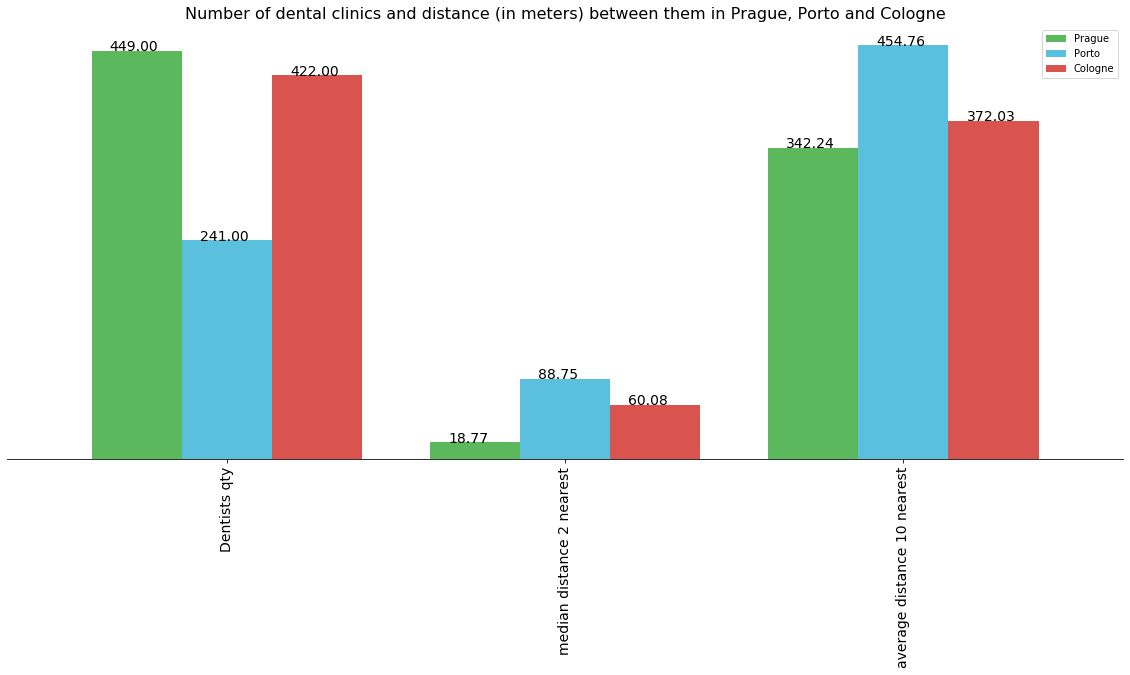

In [115]:
ax = summary.plot(kind='bar', figsize =(20, 8),
                  color = ['#5cb85c', '#5bc0de', '#d9534f'], width = 0.8)

ax.set_title("Number of dental clinics and distance (in meters) between them in Prague, Porto and Cologne", size = 16)
right_side = ax.spines["right"]
right_side.set_visible(False)
left_side = ax.spines["left"]
left_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.tick_params(axis='x', labelsize=14)

x_offset = -0.08
y_offset = 0.02

for p in ax.patches:
    b = p.get_bbox()
    val = "{:.2f}".format(b.y1 + b.y0)
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1+y_offset), size=14)

x=((b.x0 + b.x1)/2 + x_offset)
y= b.y1+y_offset